## Importing Libraries

In [81]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten,Dense,MaxPooling2D,Activation,Dropout
from keras.preprocessing import image
from keras import backend as K
import numpy as np
from keras import regularizers
import os

## Data Preprocesing

In [45]:
width,height = 250,250
train_data_dir = r'C:\Users\KRISHNA VAMSI NADH\Downloads\Cars_Bikes'
validation_data_dir = r'C:\Users\KRISHNA VAMSI NADH\Downloads\Car_Bikes_validation'
no_of_samples = 40
no_of_validation_samples = 16
epochs = 50
batch_size = 30
if K.image_data_format() == 'channels_first':
    input_shape = (width,height,3)
else:
    input_shape = (3,width,height)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width,height),
    batch_size=20,class_mode='binary')
validation_data_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (width,height),
batch_size = 20,
class_mode = 'binary'
)




Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Buiding Model

In [49]:
## Creating Sequential object
model = Sequential()
## Adding input Layer and first conv layer
model.add(Conv2D(64,(3,3),input_shape=(width,height,3),kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape=(width,height,3),kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape=(width,height,3),kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(
loss='binary_crossentropy',
optimizer = 'rmsprop',
metrics = ['accuracy']

)

model_history = model.fit_generator(train_generator,
steps_per_epoch= no_of_samples//batch_size, #no of batches of total dataset
epochs = 100,
validation_data = validation_data_generator,
validation_steps = no_of_validation_samples//batch_size
)

model.save('Car_Bike.h5')






Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 248, 248, 64)      1792      
_________________________________________________________________
activation_56 (Activation)   (None, 248, 248, 64)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
activation_57 (Activation)   (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 59, 59, 64)      

C:\Users\KRISHNA VAMSI NADH\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1/1 [==============================] - 6s 6s/step - loss: 20.7654 - accuracy: 0.4500 - val_loss: 15457.2461 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 95.3390 - accuracy: 0.4000 - val_loss: 918.8903 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 21.2800 - accuracy: 0.4500 - val_loss: 706.4573 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 20.7502 - accuracy: 0.5000 - val_loss: 154.0161 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 5s 5s/step - loss: 18.5820 - accuracy: 0.4500 - val_loss: 63.4358 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 17.8076 - accuracy: 0.6000 - val_loss: 76.8079 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 17.5450 - accuracy: 0.5500 - val_loss: 21.2439 - val_accuracy: 0.6250
Epoch 8/100
1/1 [=========

Epoch 60/100
1/1 [==============================] - 4s 4s/step - loss: 9.3567 - accuracy: 1.0000 - val_loss: 47.3614 - val_accuracy: 0.8125
Epoch 61/100
1/1 [==============================] - 4s 4s/step - loss: 9.2556 - accuracy: 1.0000 - val_loss: 23.5087 - val_accuracy: 0.8750
Epoch 62/100
1/1 [==============================] - 5s 5s/step - loss: 9.1187 - accuracy: 1.0000 - val_loss: 29.6299 - val_accuracy: 0.8750
Epoch 63/100
1/1 [==============================] - 4s 4s/step - loss: 8.9778 - accuracy: 1.0000 - val_loss: 33.8782 - val_accuracy: 0.9375
Epoch 64/100
1/1 [==============================] - 4s 4s/step - loss: 8.9938 - accuracy: 0.9500 - val_loss: 78.3890 - val_accuracy: 0.7500
Epoch 65/100
1/1 [==============================] - 4s 4s/step - loss: 9.0634 - accuracy: 0.9000 - val_loss: 775.0887 - val_accuracy: 0.5000
Epoch 66/100
1/1 [==============================] - 4s 4s/step - loss: 10.7158 - accuracy: 0.5000 - val_loss: 195.8280 - val_accuracy: 0.5000
Epoch 67/100
1/1 

## Evaluating model

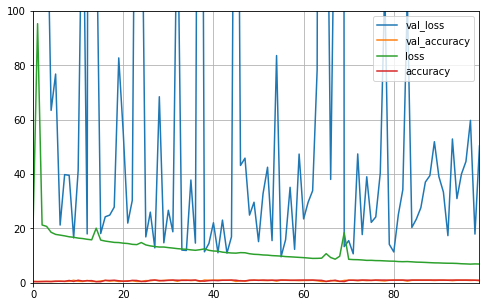

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 100)
plt.show()

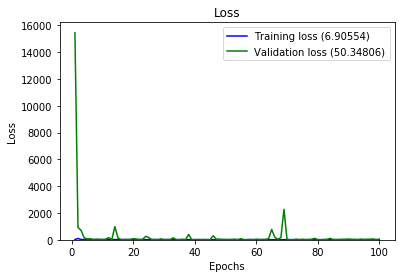

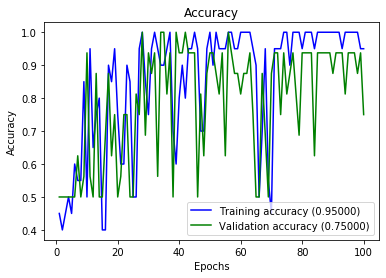

In [53]:
import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    #plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    #plt.ylim(0, 1)    
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#import above function and pass the parameter used while training    
plot_history(model_history)    

## Predicting results

In [117]:
def predict(image_path):
    image_to_predict = image.load_img(path,target_size=(width,height,3))
    plt.imshow(image_to_predict)
    plt.show()

    image_to_predict = image.img_to_array(image_to_predict)
    image_to_predict = np.expand_dims(image_to_predict,axis=0)
    result = model.predict(image_to_predict)
    print(result)
    if result[0][0] == 0:
        prediction = 'bike'
    else:
        prediction = 'car'
    print(prediction)

    

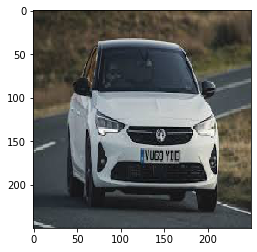

[[1.]]
car


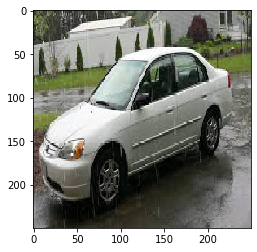

[[0.99999976]]
car


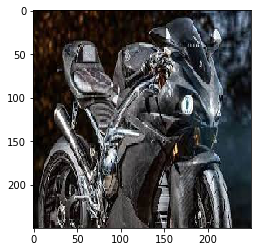

[[0.]]
bike


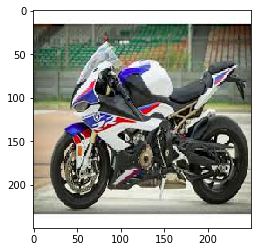

[[0.]]
bike


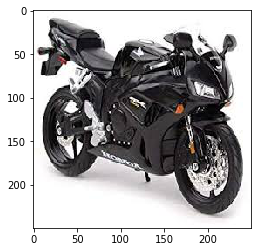

[[0.]]
bike


In [118]:
test_dir = r'C:\Users\KRISHNA VAMSI NADH\Downloads\Cars_Bikes_testing\Bikes'
for img in os.listdir(test_dir):
    path = test_dir+'/'+img
    predict(path)